In [1]:
using Revise
using FourierOptics
using FFTW
using CairoMakie

In [2]:
my_theme = (
    # font="Helvetica",
    resolution=(1024, 1024),
    Axis=(
        aspect=DataAspect(),
        titlesize=48,
        titlegap=30,
        xticklabelsize=32,
        yticklabelsize=32,
        xticklabelpad=20,
        yticklabelpad=20,
        xlabelsize=40,
        ylabelsize=40,
        xlabelpadding=10
    ),
    Heatmap=(
        colormap=:bone,
    )
)
set_theme!(theme_black(); my_theme...)

In [3]:
gpu = true

true

In [4]:
L = (13, 13) .* 1e-3
N = (2000, 2000)
λ = [543] * 1e-9

1-element Vector{Float64}:
 5.43e-7

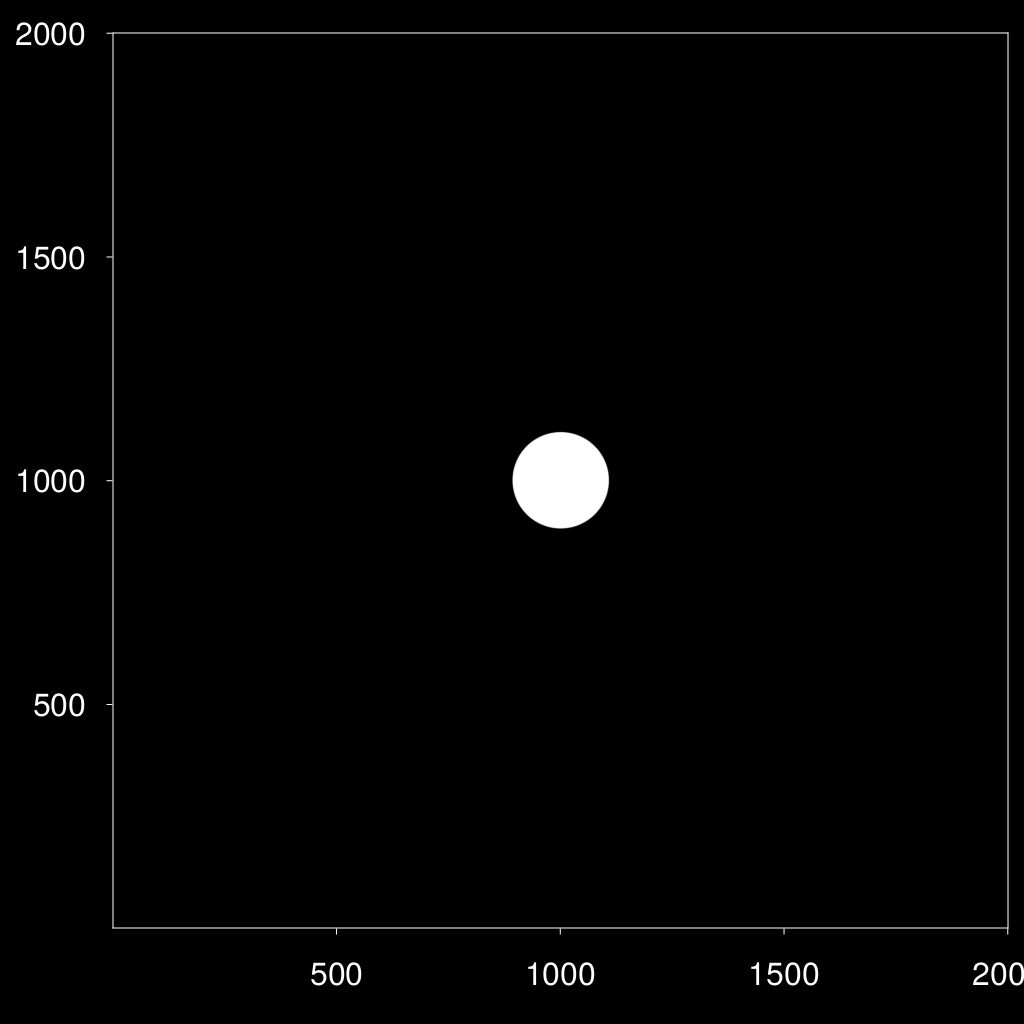

In [5]:
ap_circ = aperture(N..., 0.7e-3 ./ L .* N, shape=:circ)
heatmap(ap_circ)

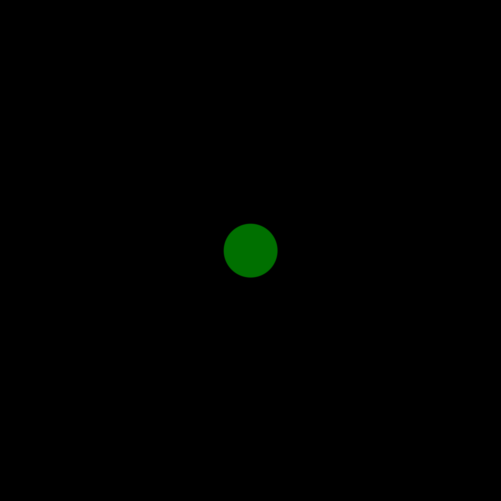

In [6]:
E = ap_circ * 0.33
u = CoherentField2D(L, N, λ, E, gpu=gpu)
get_color(u)

In [7]:
f = 100e-2
lens_100 = lens(u, f, gpu=gpu);

In [8]:
plan = plan_fft!(u)

CUFFT in-place complex forward plan for 2000×2000×1 CuArray of ComplexF32

In [9]:
let x = 1000u.x, y = 1000u.y
    z = Observable(0.0)
    n_step = 100
    framerate = 10

    d = 1 / n_step
    H = propagatorTF(u, d, gpu=gpu)

    u_1 = deepcopy(u)
    u_2 = deepcopy(u)
    u_2.E .*= lens_100

    fig = Figure(resolution=(1024, 800))
    axis_lim = (-3, 3, -3, 3)
    ax1 = Axis(fig[1, 1], limits=axis_lim, title="without lens")
    ax2 = Axis(fig[1, 2], limits=axis_lim, title="lens(f=100 cm)")
    Label(
        fig[0, :],
        @lift("z = $(lpad(string(round(100*$z, digits = 1)), 4, ' ')) cm"),
        font="JuliaMono",
        textsize=60
    )
    
    img_1 = image!(ax1, x, y, get_color(u_1))
    img_2 = image!(ax2, x, y, get_color(u_2))
    fig

    record(fig, "test.gif", 1:n_step; framerate=framerate) do n
        propTF!(u_1.E, H, plan)
        propTF!(u_2.E, H, plan)
        img_1[3] = get_color(u_1)
        img_2[3] = get_color(u_2)
        z[] = z[] + d
        n % 20 == 0 && @show n
    end
end

n = 20

n = 40


n = 60


n = 80

n = 100

"test.gif"